In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew 
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

### 1 -  Load data and prepare id column for submission

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = test.sample(frac=1).reset_index(drop=True)
train = train.sample(frac=1).reset_index(drop=True)
test.corr()
train_id = train['Id']
test_id = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

### 2 - Visualize data 

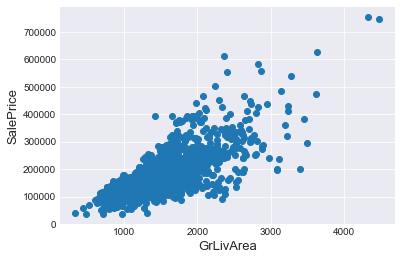

In [4]:
#They are few abusive value, we can safely delete them
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()
#We can see that the distribution is almost linear with some variation due to other factor like location


 mu = 180932.92 and sigma = 79467.79



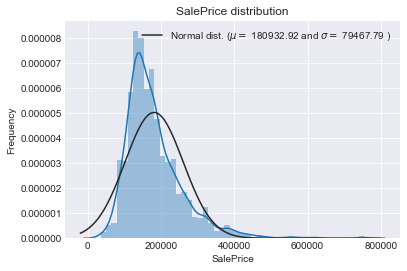

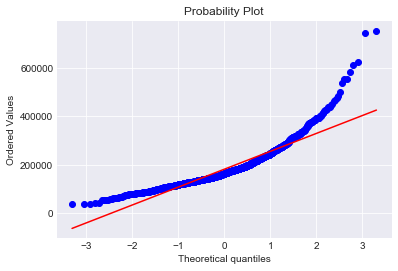

In [5]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


In [6]:
train["SalePrice"] = np.log1p(train["SalePrice"])


 mu = 12.02 and sigma = 0.40



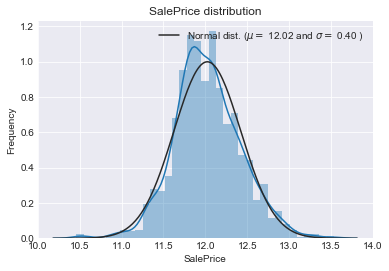

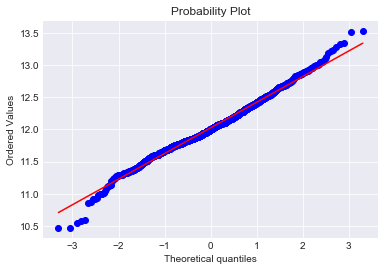

In [7]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

We can see that Sales Price may be approach by a normal distribution, we applied log(1+x) transformation to reduce variance and means


 mu = 1510.47 and sigma = 507.70



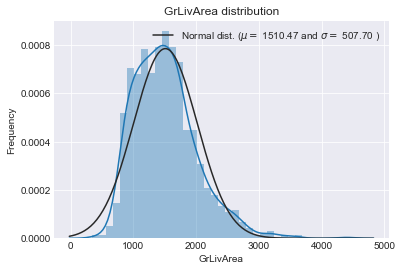

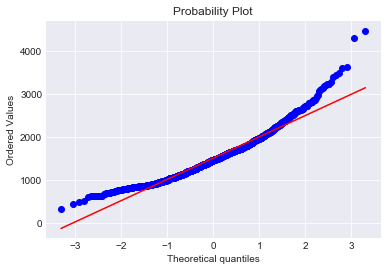

In [8]:
sns.distplot(train['GrLivArea'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['GrLivArea'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('GrLivArea distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)
plt.show()

In [9]:
train["GrLivArea"] = np.log1p(train["GrLivArea"])


 mu = 7.27 and sigma = 0.33



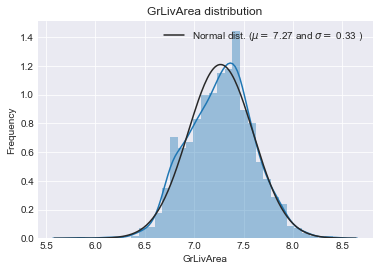

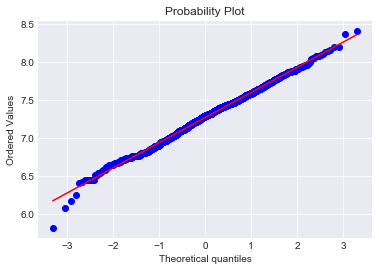

In [10]:
sns.distplot(train['GrLivArea'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['GrLivArea'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('GrLivArea distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)
plt.show()

### 3 - Process data quality

Check the data quality of MasVnrArea

In [11]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))


all_data size is : (2917, 79)


In [12]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


Text(0.5,1,'Percent missing data by feature')

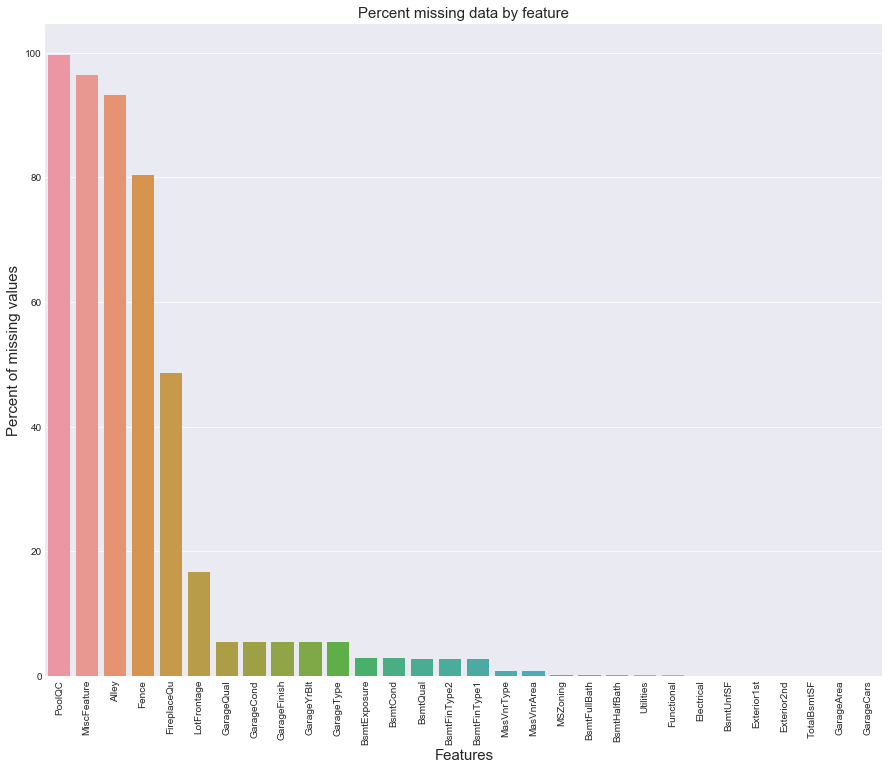

In [13]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [14]:
all_data.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2917.000,2917.000,2917.000,2917.000,2916.000,2916.000,2915.000,2915.000,2916.000,2917.000,...,2917.000,2917.000,2917.000,2917.000,2917.000,2916.000,2917.000,2917.000,2917.000,2917.000
mean,1157.692,335.862,2.604,2.860,439.015,49.616,0.429,0.061,560.696,23.114,...,5.565,6.086,2.089,16.073,6.448,1049.328,93.629,1971.288,1984.248,2007.793
std,385.264,428.120,25.197,0.823,444.182,169.259,0.524,0.246,439.652,64.263,...,1.113,1.407,34.561,56.202,1.564,429.106,126.533,30.287,20.892,1.315
min,334.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,1.000,0.000,0.000,2.000,0.000,0.000,1872.000,1950.000,2006.000
25%,876.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,220.000,0.000,...,5.000,5.000,0.000,0.000,5.000,793.000,0.000,1953.000,1965.000,2007.000
50%,1082.000,0.000,0.000,3.000,368.000,0.000,0.000,0.000,467.000,0.000,...,5.000,6.000,0.000,0.000,6.000,988.500,0.000,1973.000,1993.000,2008.000
75%,1384.000,704.000,0.000,3.000,733.000,0.000,1.000,0.000,804.500,0.000,...,6.000,7.000,0.000,0.000,7.000,1302.000,168.000,2001.000,2004.000,2009.000
max,5095.000,2065.000,508.000,8.000,4010.000,1526.000,3.000,2.000,2336.000,1012.000,...,9.000,10.000,800.000,576.000,15.000,5095.000,1424.000,2010.000,2010.000,2010.000


In [15]:
all_data.corr(method='pearson', min_periods=1000)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1stFlrSF,1.000,-0.264,0.045,0.110,0.435,0.087,0.256,0.013,0.302,-0.065,...,-0.158,0.476,0.085,0.102,0.384,0.794,0.227,0.311,0.241,-0.013
2ndFlrSF,-0.264,1.000,-0.032,0.504,-0.177,-0.097,-0.165,-0.060,-0.001,0.055,...,0.006,0.243,0.039,0.012,0.583,-0.222,0.089,0.016,0.158,-0.019
3SsnPorch,0.045,-0.032,1.000,-0.048,0.053,-0.023,0.028,0.027,-0.006,-0.033,...,0.044,0.019,-0.006,-0.030,-0.026,0.040,-0.004,0.016,0.038,0.023
BedroomAbvGr,0.110,0.504,-0.048,1.000,-0.117,-0.031,-0.156,0.019,0.183,0.050,...,-0.008,0.073,0.037,0.007,0.672,0.054,0.032,-0.053,-0.022,-0.020
BsmtFinSF1,0.435,-0.177,0.053,-0.117,1.000,-0.055,0.643,0.082,-0.490,-0.100,...,-0.049,0.275,0.034,0.101,0.035,0.511,0.224,0.280,0.150,0.023
BsmtFinSF2,0.087,-0.097,-0.023,-0.031,-0.055,1.000,0.164,0.099,-0.238,0.033,...,0.041,-0.042,0.047,0.063,-0.048,0.094,0.099,-0.027,-0.062,0.009
BsmtFullBath,0.256,-0.165,0.028,-0.156,0.643,0.164,1.000,-0.149,-0.399,-0.068,...,-0.041,0.161,0.031,0.054,-0.044,0.321,0.185,0.210,0.134,0.045
BsmtHalfBath,0.013,-0.060,0.027,0.019,0.082,0.099,-0.149,1.000,-0.107,-0.010,...,0.084,-0.040,0.070,0.042,-0.049,0.014,0.052,-0.030,-0.046,-0.020
BsmtUnfSF,0.302,-0.001,-0.006,0.183,-0.490,-0.238,-0.399,-0.107,1.000,0.005,...,-0.138,0.275,-0.032,-0.049,0.248,0.423,-0.039,0.130,0.165,-0.038
EnclosedPorch,-0.065,0.055,-0.033,0.050,-0.100,0.033,-0.068,-0.010,0.005,1.000,...,0.071,-0.139,0.097,-0.064,0.016,-0.086,-0.119,-0.374,-0.220,-0.001


In [16]:
data_garage = all_data[['GarageCars', 'GarageArea']]
data_garage.corr()

,GarageCars,GarageArea
GarageCars,1.000,0.892
GarageArea,0.892,1.000


In [17]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [18]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [19]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [20]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [21]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [22]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


In [23]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [24]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [25]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [94]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [27]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [28]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [29]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [30]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1165 (0.0113)



In [31]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1152 (0.0056)



In [35]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [38]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
stacked_averaged_models = StackingAveragedModels(base_models = (GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1107 (0.0075)


In [39]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

In [ ]:
RFR = RandomForestRegressor(max_depth=50, n_jobs=-1)
RFR.fit(train.values, y_train)

In [51]:
rfr_train_pred = RFR.predict(train.values)
rfr_pred = np.expm1(RFR.predict(test.values))
print(rmsle(y_train, rfr_train_pred))

0.06261103010645128


In [57]:
def optimize_rfr():
    value_min = 10000
    nb_estimators = 0
    nb_max_depth = 0
    
    for i in range(10,50):
        for j in range(10, 100):
            RF = RandomForestRegressor(n_estimators=i, max_depth=j, n_jobs=-1)
            RF.fit(train.values, y_train)
            rfr_train_pred = RF.predict(train.values)
            rfr_pred = np.expm1(RF.predict(test.values))
            print(rmsle(y_train, rfr_train_pred))
            if rmsle(y_train, rfr_train_pred) < value_min:
                value_min = rmsle(y_train, rfr_train_pred)
                nb_estimators = i
                nb_max_depth = j
    return value_min, nb_estimators, nb_max_depth
value, estim, depth = optimize_rfr()

0.07292705543751066
0.06699676127033095
0.06643005172330894
0.06364412448381518
0.05990495115622668
0.06304476580036715
0.06063910524079604
0.06092216506822924
0.06122284053508604
0.0639464991747204
0.06062039690475346
0.06426951989116277
0.06044506720870687
0.06099851645502283
0.06019330219658254
0.05758598287258385
0.06195634044178025
0.06431464148711616
0.062026030151356944
0.06004060037084783
0.06274289999206778
0.06362588244780533
0.062222482226340636
0.06408794275622914
0.061927450065758234
0.06236112287596093
0.06078004612588251
0.060734381287944166
0.06038737188011211
0.061084219555435776
0.062107796690142214
0.06476704293637522
0.06133811161697313
0.06209225202943188
0.06079027259680673
0.06238445187747061
0.06125467733514932
0.06341498846657034
0.05985051643188704
0.061719843090501415
0.06363613351735121
0.0655419962305871
0.06322312300326492
0.06592433358810905
0.0635524657067739
0.06323509230132317
0.06397972557916448
0.06253027754957245
0.060606175258697235
0.0598449844763

0.06119600175970031
0.05843340518623379
0.06140535853890872
0.057810035978097994
0.05883676406553738
0.05685023389204751
0.05599705996112639
0.06020146162405195
0.05785690076733193
0.06171552079221048
0.05632773841911404
0.05976311046754142
0.05889619691742173
0.05736449979320992
0.058430643845885415
0.058000746208976946
0.05870120010522274
0.06290135688800694
0.05663626685437776
0.059568809029201565
0.05933693713012497
0.05886886110498482
0.05952910619756861
0.059247147777801525
0.060652843138859075
0.05922701074363249
0.056456578936347306
0.05887713707951363
0.05959475337911247
0.05876192874767049
0.05810946519617562
0.06020112846687148
0.05824313826094616
0.057520248324424164
0.057516161399477246
0.059229764557968814
0.058605208425644734
0.0624621618663734
0.05792673043866346
0.05675796467936652
0.054779084284647346
0.05965252171072346
0.05867651297344704
0.057129090337682986
0.06568140996885358
0.060818735007116584
0.06074556594898233
0.060475097245908126
0.05894564802035026
0.0599

0.06304975219283475
0.059149759154436654
0.05906122313477301
0.058275550354464856
0.05847372889050818
0.05769105691988132
0.05470010772723827
0.057136878399641496
0.05864320068152984
0.05558514175397431
0.05849971372201979
0.05614171344750811
0.057903949394958125
0.0561981122718888
0.05465859751407424
0.05627876505659028
0.05560219349381837
0.055527560416559374
0.05452276909109933
0.05752433492196973
0.056013284103103675
0.057637702807987475
0.06030814744231782
0.05770209433018775
0.05365772445010657
0.05376410685867189
0.05812230646606269
0.05580666801135248
0.05496556588226503
0.057819296331501284
0.05606223463057206
0.0578004168394678
0.057679332156956975
0.05610833855046316
0.05562253921295577
0.056711930656103776
0.055299035905265734
0.058467914055077355
0.05452563207369779
0.05855549970330194
0.057375783026856114
0.05449048015477831
0.05533114378061937
0.057080812811287074
0.054907879771546535
0.056393173125340194
0.05908021560279048
0.05781591087472849
0.05519347170677942
0.0566

0.05579527250201174
0.05604077909037092
0.0554397450827418
0.05366541756112008
0.057021732877466196
0.0541068007149891
0.05632231206331898
0.055718888890409476
0.055031140699653584
0.055752133563166814
0.057665446548048324
0.05509906335592265
0.05355648530198625
0.056439879675701174
0.05479859189402473
0.055803894678042545
0.0560392937707443
0.05526627460626826
0.05578700774577039
0.05462263921125209
0.05600689083719954
0.05584396540147729
0.05224465054357418
0.055169364886699934
0.05520382206898213
0.055773499339442714
0.05495897264114833
0.05519455838107042
0.05466735970290454
0.05563732161049834
0.05614441778903274
0.05354167628704465
0.05498191255117612
0.05516384557630235
0.055187727452160024
0.05480473994828388
0.05596168161039919
0.0562393882293188
0.05430507899727126
0.05479235476209322
0.05620215599306518
0.05529720907947021
0.056740437068994475
0.054533661420764164
0.06429055500569655
0.061451194269192315
0.059081807945576985
0.05631440415556692
0.05847952478479649
0.05487041

0.05974218557398462
0.056021698980321395
0.054813021578633936
0.055686457493630076
0.05594673244964054
0.05649264158518013
0.05462094757179464
0.05511616443403821
0.053454728122027166
0.05447477199659876
0.05345691338914765
0.0540285145850146
0.05515096069393853
0.05515675217127185
0.05485768098134611
0.054241843638175795
0.053897316955238174
0.05351252234032247
0.054860977742544406
0.05500885143952507
0.054576691594102125
0.05510522022703835
0.054753057557721786
0.053035596856586625
0.05233410522980402
0.05407548500297946
0.05460407547324653
0.055267099340340985
0.052999620921437875
0.054856377222720014
0.05320216438693137
0.05261572491489864
0.054374572964591465
0.05583706327999189
0.054283791597638874
0.05453183509446347
0.05431573858953967
0.05379404583061115
0.05548926115291687
0.05358048896900815
0.05663359314485766
0.05261090850519605
0.055726451748423854
0.05476840174654193
0.05400615321236237
0.05384807055904069
0.055007747027797156
0.05539399835691321
0.05654746599834873
0.05

0.054559077128839915
0.053827612243294055
0.05422492547384914
0.054456209778044926
0.055053101335946514
0.053628505429142236
0.05592236427619805
0.05327896865892835
0.05423652419119486
0.05158128152356155
0.05357109117231351
0.053323656719350174
0.053822735600082126
0.05409772643652169
0.05345897531565493
0.053312639313272625
0.0560428157729059
0.052654838946419875
0.05348949169729963
0.05295244837929085
0.05370969078718013
0.055229457020054586
0.05249723046581
0.052187485182663404
0.05494745706982177
0.05537249655306442
0.054507692686770276
0.054423147360669846
0.053641037231332005
0.05285116219512359
0.05463522900399391
0.05322973430561229
0.054764349519507385
0.053689766707775255
0.05363930588369956
0.05365977297830884
0.05431767983045798
0.05393975301656469
0.053589350043815466
0.05383081232353047
0.05442817520844523
0.0547245568990736
0.05493319173949235
0.05353219166204865
0.0648705628626215
0.05855781012968412
0.05593566041535113
0.053975367740452425
0.05383122972154492
0.055107

0.055473605622371414
0.05366255892797954
0.05571189462967953
0.05409787508707641
0.05503832831438008
0.055002704199376425
0.053807192422642945
0.05314640663491257
0.05202561344203501
0.055173816213606335
0.053788378812709266
0.05323556937029286
0.052643867038898666
0.05190592702123056
0.053666152306595244
0.05443696809338171
0.053397447125956655
0.0517334288919874
0.05426029354737154
0.05360066444801273
0.05276117902026033
0.051687496713751
0.052739608207710995
0.053750411635930126
0.05304125429725094
0.0521429629389165
0.05336585755463838
0.053833125506194915
0.05333033282259966
0.05262202836767736
0.05255705997115114
0.05320616337345442
0.05172384735544905
0.052972808244004035
0.05410051536074849
0.05360196345599325
0.05182772531414998
0.05511890651527961
0.05216499237776622
0.05233493124238159
0.05400235349354292
0.053647706213930474
0.05286769785228934
0.05434800887201437
0.05420680809374731
0.05264855411826733
0.0540837724707674
0.05226775734492186
0.05597852229336436
0.0528195920

0.05428736258940082
0.053279492312891474
0.05260830539681579
0.05277981797903605
0.05283646517518088
0.05275836897422518
0.05389927493819212
0.052675221711038035
0.05352418893955403
0.0533178140363932
0.053065230517053474
0.052886205656408156
0.05236473661882679
0.052098280768529716
0.05316112649332388
0.05309933406158243
0.05374194784048549
0.05397794446771609
0.052289092993374725
0.0536453035915254
0.053041452376271316
0.05180936442844269
0.05223349369331978
0.053033972649707634
0.052949477542908345
0.052944659612502706
0.0527605493426382
0.0540528667066299
0.05350295757355718
0.05275866764621716
0.05198500123417714
0.053045084243753315
0.05304688956226535
0.055025061995851936
0.05300527121263058
0.05228623276550524
0.05375591146668696
0.05141407953703128
0.051264888038435076
0.05278717997961665
0.05305373710539456
0.05343121871349577
0.06272707256668901
0.058492501630509806
0.055711162357792256
0.055055624750564705
0.05431716499725495
0.05465700435301793
0.05071370294181305
0.053429

0.052022989256661725
0.0527004380944068
0.05376523986327013
0.05428243798256652
0.05306028801299836
0.052775360852703804
0.051527117717240424
0.05447416933222566
0.05323786896507075
0.052632139568919246
0.05173474469295409
0.052446241285241196
0.051476404831726
0.052658836056120775
0.054552250857965244
0.05329861903484167
0.05299469028147771
0.052123222111427094
0.05397204640643808
0.052294913608141896
0.05220346364520264
0.052620388324399546
0.05317982950660354
0.05130751211920046
0.052013173369127495
0.053161107255649695
0.05246628712823891
0.05310441318396115
0.05285793875967327
0.053230471374734294
0.05398602292499987
0.05273316332511446
0.05297422367596101
0.05213896410866355
0.05172131069609828
0.05163921971768572
0.052836528721991974
0.05395788490621328
0.052621628746853506
0.054606281769369436
0.052087210078856215
0.05304081856879003
0.05279121913568197
0.05283359589162859
0.05208341828908326
0.05202491937628117
0.052393728965638604
0.051257139623864294
0.05255750838664702
0.05

In [ ]:
print(value, estim, depth)
RFR2 = RandomForestRegressor(n_estimators=44, max_depth=44, n_jobs=-1)
RFR2.fit(train.values, y_train)
rfr_train_pred2 = RFR2.predict(train.values)
rfr_pred2 = np.expm1(RFR2.predict(test.values))
print(rmsle(y_train, rfr_train_pred2))

In [102]:
lr = LinearRegression(normalize=True, n_jobs=-1)
lr.fit(train.values, y_train)
lr_pred = np.expm1(lr.predict(test.values))
print(rmsle(y_train, lr.predict(train.values)))

0.09506196349865083


/Users/rugerypierrick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in expm1
  This is separate from the ipykernel package so we can avoid doing imports until


In [92]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
model = Sequential()
print(train.shape)
#model.add(Dense(256, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(1, input_dim = train.shape[1], W_regularizer=l1(0.001)))

model.compile(loss = "mse", optimizer = "adam")
model.summary()
hist = model.fit(train.values, y_train, validation_data = (train.values, y_train), epochs=2000)

(1458, 220)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1)                 221       
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Train on 1458 samples, validate on 1458 samples
Epoch 1/2000
1458/1458 [==============================] - 0s 312us/step - loss: 96.7560 - val_loss: 27.1861
Epoch 2/2000
1458/1458 [==============================] - 0s 66us/step - loss: 9.8098 - val_loss: 2.3308
Epoch 3/2000
1458/1458 [==============================] - 0s 61us/step - loss: 1.7547 - val_loss: 1.5881
Epoch 4/2000
1458/1458 [==============================] - 0s 64us/step - loss: 1.5174 - val_loss: 1.4348
Epoch 5/2000
1458/1458 [==============================] - 0s 66us/step - loss: 1.3635 - val_loss: 1.2832
Epoch 6/2000
1458/1458 [==============================] - 0s 63us/step - loss: 1.219

1458/1458 [==============================] - 0s 50us/step - loss: 0.2003 - val_loss: 0.1985
Epoch 74/2000
1458/1458 [==============================] - 0s 49us/step - loss: 0.1964 - val_loss: 0.1940
Epoch 75/2000
1458/1458 [==============================] - 0s 48us/step - loss: 0.1941 - val_loss: 0.1918
Epoch 76/2000
1458/1458 [==============================] - 0s 49us/step - loss: 0.1920 - val_loss: 0.1897
Epoch 77/2000
1458/1458 [==============================] - 0s 50us/step - loss: 0.1896 - val_loss: 0.1889
Epoch 78/2000
1458/1458 [==============================] - 0s 48us/step - loss: 0.1902 - val_loss: 0.1853
Epoch 79/2000
1458/1458 [==============================] - 0s 53us/step - loss: 0.1856 - val_loss: 0.1873
Epoch 80/2000
1458/1458 [==============================] - 0s 49us/step - loss: 0.1854 - val_loss: 0.1810
Epoch 81/2000
1458/1458 [==============================] - 0s 54us/step - loss: 0.1814 - val_loss: 0.1790
Epoch 82/2000
1458/1458 [==============================] - 0

Epoch 150/2000
1458/1458 [==============================] - 0s 62us/step - loss: 0.0672 - val_loss: 0.0651
Epoch 151/2000
1458/1458 [==============================] - 0s 54us/step - loss: 0.0661 - val_loss: 0.0641
Epoch 152/2000
1458/1458 [==============================] - 0s 55us/step - loss: 0.0644 - val_loss: 0.0632
Epoch 153/2000
1458/1458 [==============================] - 0s 56us/step - loss: 0.0638 - val_loss: 0.0688
Epoch 154/2000
1458/1458 [==============================] - 0s 55us/step - loss: 0.0636 - val_loss: 0.0675
Epoch 155/2000
1458/1458 [==============================] - 0s 50us/step - loss: 0.0626 - val_loss: 0.0602
Epoch 156/2000
1458/1458 [==============================] - 0s 57us/step - loss: 0.0611 - val_loss: 0.0593
Epoch 157/2000
1458/1458 [==============================] - 0s 60us/step - loss: 0.0597 - val_loss: 0.0585
Epoch 158/2000
1458/1458 [==============================] - 0s 59us/step - loss: 0.0599 - val_loss: 0.0577
Epoch 159/2000
1458/1458 [===========

1458/1458 [==============================] - 0s 65us/step - loss: 0.0348 - val_loss: 0.0335
Epoch 227/2000
1458/1458 [==============================] - 0s 72us/step - loss: 0.0359 - val_loss: 0.0343
Epoch 228/2000
1458/1458 [==============================] - 0s 90us/step - loss: 0.0340 - val_loss: 0.0330
Epoch 229/2000
1458/1458 [==============================] - 0s 77us/step - loss: 0.0353 - val_loss: 0.0355
Epoch 230/2000
1458/1458 [==============================] - 0s 80us/step - loss: 0.0345 - val_loss: 0.0350
Epoch 231/2000
1458/1458 [==============================] - 0s 93us/step - loss: 0.0346 - val_loss: 0.0343
Epoch 232/2000
1458/1458 [==============================] - 0s 81us/step - loss: 0.0343 - val_loss: 0.0331
Epoch 233/2000
1458/1458 [==============================] - 0s 81us/step - loss: 0.0340 - val_loss: 0.0338
Epoch 234/2000
1458/1458 [==============================] - 0s 85us/step - loss: 0.0334 - val_loss: 0.0331
Epoch 235/2000
1458/1458 [==========================

1458/1458 [==============================] - 0s 84us/step - loss: 0.0327 - val_loss: 0.0312
Epoch 303/2000
1458/1458 [==============================] - 0s 72us/step - loss: 0.0318 - val_loss: 0.0304
Epoch 304/2000
1458/1458 [==============================] - 0s 55us/step - loss: 0.0316 - val_loss: 0.0303
Epoch 305/2000
1458/1458 [==============================] - 0s 56us/step - loss: 0.0309 - val_loss: 0.0327
Epoch 306/2000
1458/1458 [==============================] - 0s 60us/step - loss: 0.0320 - val_loss: 0.0304
Epoch 307/2000
1458/1458 [==============================] - 0s 66us/step - loss: 0.0311 - val_loss: 0.0303
Epoch 308/2000
1458/1458 [==============================] - 0s 59us/step - loss: 0.0314 - val_loss: 0.0303
Epoch 309/2000
1458/1458 [==============================] - 0s 59us/step - loss: 0.0314 - val_loss: 0.0309
Epoch 310/2000
1458/1458 [==============================] - 0s 58us/step - loss: 0.0340 - val_loss: 0.0345
Epoch 311/2000
1458/1458 [==========================

1458/1458 [==============================] - 0s 85us/step - loss: 0.0304 - val_loss: 0.0306
Epoch 379/2000
1458/1458 [==============================] - 0s 72us/step - loss: 0.0303 - val_loss: 0.0325
Epoch 380/2000
1458/1458 [==============================] - 0s 73us/step - loss: 0.0317 - val_loss: 0.0308
Epoch 381/2000
1458/1458 [==============================] - 0s 73us/step - loss: 0.0310 - val_loss: 0.0299
Epoch 382/2000
1458/1458 [==============================] - 0s 66us/step - loss: 0.0308 - val_loss: 0.0312
Epoch 383/2000
1458/1458 [==============================] - 0s 80us/step - loss: 0.0304 - val_loss: 0.0306
Epoch 384/2000
1458/1458 [==============================] - 0s 73us/step - loss: 0.0325 - val_loss: 0.0306
Epoch 385/2000
1458/1458 [==============================] - 0s 74us/step - loss: 0.0315 - val_loss: 0.0308
Epoch 386/2000
1458/1458 [==============================] - 0s 73us/step - loss: 0.0313 - val_loss: 0.0301
Epoch 387/2000
1458/1458 [==========================

1458/1458 [==============================] - 0s 65us/step - loss: 0.0301 - val_loss: 0.0295
Epoch 455/2000
1458/1458 [==============================] - 0s 56us/step - loss: 0.0302 - val_loss: 0.0294
Epoch 456/2000
1458/1458 [==============================] - 0s 58us/step - loss: 0.0308 - val_loss: 0.0297
Epoch 457/2000
1458/1458 [==============================] - 0s 93us/step - loss: 0.0303 - val_loss: 0.0308
Epoch 458/2000
1458/1458 [==============================] - 0s 78us/step - loss: 0.0316 - val_loss: 0.0458
Epoch 459/2000
1458/1458 [==============================] - 0s 79us/step - loss: 0.0337 - val_loss: 0.0297
Epoch 460/2000
1458/1458 [==============================] - 0s 90us/step - loss: 0.0311 - val_loss: 0.0331
Epoch 461/2000
1458/1458 [==============================] - 0s 79us/step - loss: 0.0309 - val_loss: 0.0307
Epoch 462/2000
1458/1458 [==============================] - 0s 84us/step - loss: 0.0309 - val_loss: 0.0313
Epoch 463/2000
1458/1458 [==========================

1458/1458 [==============================] - 0s 62us/step - loss: 0.0299 - val_loss: 0.0300
Epoch 531/2000
1458/1458 [==============================] - 0s 54us/step - loss: 0.0303 - val_loss: 0.0299
Epoch 532/2000
1458/1458 [==============================] - 0s 49us/step - loss: 0.0305 - val_loss: 0.0295
Epoch 533/2000
1458/1458 [==============================] - 0s 50us/step - loss: 0.0300 - val_loss: 0.0302
Epoch 534/2000
1458/1458 [==============================] - 0s 48us/step - loss: 0.0314 - val_loss: 0.0365
Epoch 535/2000
1458/1458 [==============================] - 0s 52us/step - loss: 0.0310 - val_loss: 0.0301
Epoch 536/2000
1458/1458 [==============================] - 0s 58us/step - loss: 0.0306 - val_loss: 0.0293
Epoch 537/2000
1458/1458 [==============================] - 0s 49us/step - loss: 0.0303 - val_loss: 0.0293
Epoch 538/2000
1458/1458 [==============================] - 0s 49us/step - loss: 0.0317 - val_loss: 0.0304
Epoch 539/2000
1458/1458 [==========================

1458/1458 [==============================] - 0s 54us/step - loss: 0.0320 - val_loss: 0.0300
Epoch 607/2000
1458/1458 [==============================] - 0s 50us/step - loss: 0.0303 - val_loss: 0.0303
Epoch 608/2000
1458/1458 [==============================] - 0s 50us/step - loss: 0.0313 - val_loss: 0.0328
Epoch 609/2000
1458/1458 [==============================] - 0s 50us/step - loss: 0.0323 - val_loss: 0.0329
Epoch 610/2000
1458/1458 [==============================] - 0s 57us/step - loss: 0.0307 - val_loss: 0.0337
Epoch 611/2000
1458/1458 [==============================] - 0s 56us/step - loss: 0.0323 - val_loss: 0.0294
Epoch 612/2000
1458/1458 [==============================] - 0s 54us/step - loss: 0.0300 - val_loss: 0.0306
Epoch 613/2000
1458/1458 [==============================] - 0s 50us/step - loss: 0.0303 - val_loss: 0.0290
Epoch 614/2000
1458/1458 [==============================] - 0s 50us/step - loss: 0.0320 - val_loss: 0.0305
Epoch 615/2000
1458/1458 [==========================

1458/1458 [==============================] - 0s 53us/step - loss: 0.0299 - val_loss: 0.0290
Epoch 683/2000
1458/1458 [==============================] - 0s 50us/step - loss: 0.0304 - val_loss: 0.0291
Epoch 684/2000
1458/1458 [==============================] - 0s 60us/step - loss: 0.0301 - val_loss: 0.0290
Epoch 685/2000
1458/1458 [==============================] - 0s 57us/step - loss: 0.0300 - val_loss: 0.0324
Epoch 686/2000
1458/1458 [==============================] - 0s 47us/step - loss: 0.0302 - val_loss: 0.0290
Epoch 687/2000
1458/1458 [==============================] - 0s 46us/step - loss: 0.0315 - val_loss: 0.0295
Epoch 688/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0330 - val_loss: 0.0306
Epoch 689/2000
1458/1458 [==============================] - 0s 46us/step - loss: 0.0303 - val_loss: 0.0351
Epoch 690/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0307 - val_loss: 0.0292
Epoch 691/2000
1458/1458 [==========================

1458/1458 [==============================] - 0s 58us/step - loss: 0.0306 - val_loss: 0.0320
Epoch 759/2000
1458/1458 [==============================] - 0s 54us/step - loss: 0.0309 - val_loss: 0.0298
Epoch 760/2000
1458/1458 [==============================] - 0s 55us/step - loss: 0.0301 - val_loss: 0.0290
Epoch 761/2000
1458/1458 [==============================] - 0s 54us/step - loss: 0.0311 - val_loss: 0.0303
Epoch 762/2000
1458/1458 [==============================] - 0s 55us/step - loss: 0.0298 - val_loss: 0.0303
Epoch 763/2000
1458/1458 [==============================] - 0s 58us/step - loss: 0.0307 - val_loss: 0.0297
Epoch 764/2000
1458/1458 [==============================] - 0s 52us/step - loss: 0.0306 - val_loss: 0.0289
Epoch 765/2000
1458/1458 [==============================] - 0s 48us/step - loss: 0.0296 - val_loss: 0.0320
Epoch 766/2000
1458/1458 [==============================] - 0s 48us/step - loss: 0.0310 - val_loss: 0.0302
Epoch 767/2000
1458/1458 [==========================

1458/1458 [==============================] - 0s 44us/step - loss: 0.0305 - val_loss: 0.0293
Epoch 835/2000
1458/1458 [==============================] - 0s 46us/step - loss: 0.0312 - val_loss: 0.0302
Epoch 836/2000
1458/1458 [==============================] - 0s 46us/step - loss: 0.0318 - val_loss: 0.0291
Epoch 837/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0297 - val_loss: 0.0294
Epoch 838/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0309 - val_loss: 0.0294
Epoch 839/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0298 - val_loss: 0.0290
Epoch 840/2000
1458/1458 [==============================] - 0s 51us/step - loss: 0.0312 - val_loss: 0.0323
Epoch 841/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0299 - val_loss: 0.0296
Epoch 842/2000
1458/1458 [==============================] - 0s 46us/step - loss: 0.0300 - val_loss: 0.0315
Epoch 843/2000
1458/1458 [==========================

1458/1458 [==============================] - 0s 60us/step - loss: 0.0309 - val_loss: 0.0337
Epoch 911/2000
1458/1458 [==============================] - 0s 60us/step - loss: 0.0295 - val_loss: 0.0289
Epoch 912/2000
1458/1458 [==============================] - 0s 66us/step - loss: 0.0305 - val_loss: 0.0297
Epoch 913/2000
1458/1458 [==============================] - 0s 60us/step - loss: 0.0303 - val_loss: 0.0290
Epoch 914/2000
1458/1458 [==============================] - 0s 59us/step - loss: 0.0315 - val_loss: 0.0295
Epoch 915/2000
1458/1458 [==============================] - 0s 60us/step - loss: 0.0305 - val_loss: 0.0303
Epoch 916/2000
1458/1458 [==============================] - 0s 59us/step - loss: 0.0300 - val_loss: 0.0290
Epoch 917/2000
1458/1458 [==============================] - 0s 61us/step - loss: 0.0306 - val_loss: 0.0290
Epoch 918/2000
1458/1458 [==============================] - 0s 62us/step - loss: 0.0295 - val_loss: 0.0315
Epoch 919/2000
1458/1458 [==========================

1458/1458 [==============================] - 0s 49us/step - loss: 0.0308 - val_loss: 0.0349
Epoch 987/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0302 - val_loss: 0.0291
Epoch 988/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0301 - val_loss: 0.0290
Epoch 989/2000
1458/1458 [==============================] - 0s 43us/step - loss: 0.0316 - val_loss: 0.0320
Epoch 990/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0300 - val_loss: 0.0293
Epoch 991/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0301 - val_loss: 0.0296
Epoch 992/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0304 - val_loss: 0.0289
Epoch 993/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0299 - val_loss: 0.0302
Epoch 994/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0336 - val_loss: 0.0295
Epoch 995/2000
1458/1458 [==========================

1458/1458 [==============================] - 0s 61us/step - loss: 0.0314 - val_loss: 0.0291
Epoch 1063/2000
1458/1458 [==============================] - 0s 60us/step - loss: 0.0296 - val_loss: 0.0291
Epoch 1064/2000
1458/1458 [==============================] - 0s 57us/step - loss: 0.0297 - val_loss: 0.0289
Epoch 1065/2000
1458/1458 [==============================] - 0s 50us/step - loss: 0.0309 - val_loss: 0.0317
Epoch 1066/2000
1458/1458 [==============================] - 0s 48us/step - loss: 0.0312 - val_loss: 0.0292
Epoch 1067/2000
1458/1458 [==============================] - 0s 52us/step - loss: 0.0309 - val_loss: 0.0300
Epoch 1068/2000
1458/1458 [==============================] - 0s 60us/step - loss: 0.0307 - val_loss: 0.0299
Epoch 1069/2000
1458/1458 [==============================] - 0s 67us/step - loss: 0.0297 - val_loss: 0.0291
Epoch 1070/2000
1458/1458 [==============================] - 0s 55us/step - loss: 0.0307 - val_loss: 0.0290
Epoch 1071/2000
1458/1458 [=================

1458/1458 [==============================] - 0s 44us/step - loss: 0.0306 - val_loss: 0.0369
Epoch 1139/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0306 - val_loss: 0.0318
Epoch 1140/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0314 - val_loss: 0.0303
Epoch 1141/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0315 - val_loss: 0.0291
Epoch 1142/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0305 - val_loss: 0.0306
Epoch 1143/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0309 - val_loss: 0.0289
Epoch 1144/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0297 - val_loss: 0.0302
Epoch 1145/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0298 - val_loss: 0.0320
Epoch 1146/2000
1458/1458 [==============================] - 0s 43us/step - loss: 0.0307 - val_loss: 0.0294
Epoch 1147/2000
1458/1458 [=================

Epoch 1214/2000
1458/1458 [==============================] - 0s 46us/step - loss: 0.0300 - val_loss: 0.0299
Epoch 1215/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0318 - val_loss: 0.0290
Epoch 1216/2000
1458/1458 [==============================] - 0s 43us/step - loss: 0.0303 - val_loss: 0.0287
Epoch 1217/2000
1458/1458 [==============================] - 0s 42us/step - loss: 0.0311 - val_loss: 0.0290
Epoch 1218/2000
1458/1458 [==============================] - 0s 41us/step - loss: 0.0296 - val_loss: 0.0288
Epoch 1219/2000
1458/1458 [==============================] - 0s 41us/step - loss: 0.0300 - val_loss: 0.0288
Epoch 1220/2000
1458/1458 [==============================] - 0s 43us/step - loss: 0.0299 - val_loss: 0.0296
Epoch 1221/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0296 - val_loss: 0.0288
Epoch 1222/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0295 - val_loss: 0.0294
Epoch 1223/2000
1458/1458 [=

Epoch 1290/2000
1458/1458 [==============================] - 0s 58us/step - loss: 0.0308 - val_loss: 0.0308
Epoch 1291/2000
1458/1458 [==============================] - 0s 47us/step - loss: 0.0297 - val_loss: 0.0290
Epoch 1292/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0307 - val_loss: 0.0313
Epoch 1293/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0314 - val_loss: 0.0290
Epoch 1294/2000
1458/1458 [==============================] - 0s 58us/step - loss: 0.0298 - val_loss: 0.0287
Epoch 1295/2000
1458/1458 [==============================] - 0s 62us/step - loss: 0.0296 - val_loss: 0.0307
Epoch 1296/2000
1458/1458 [==============================] - 0s 61us/step - loss: 0.0301 - val_loss: 0.0289
Epoch 1297/2000
1458/1458 [==============================] - 0s 49us/step - loss: 0.0324 - val_loss: 0.0302
Epoch 1298/2000
1458/1458 [==============================] - 0s 48us/step - loss: 0.0316 - val_loss: 0.0311
Epoch 1299/2000
1458/1458 [=

Epoch 1366/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0296 - val_loss: 0.0316
Epoch 1367/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0311 - val_loss: 0.0303
Epoch 1368/2000
1458/1458 [==============================] - 0s 62us/step - loss: 0.0312 - val_loss: 0.0298
Epoch 1369/2000
1458/1458 [==============================] - 0s 62us/step - loss: 0.0304 - val_loss: 0.0293
Epoch 1370/2000
1458/1458 [==============================] - 0s 49us/step - loss: 0.0303 - val_loss: 0.0312
Epoch 1371/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0295 - val_loss: 0.0289
Epoch 1372/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0309 - val_loss: 0.0321
Epoch 1373/2000
1458/1458 [==============================] - 0s 49us/step - loss: 0.0304 - val_loss: 0.0312
Epoch 1374/2000
1458/1458 [==============================] - 0s 43us/step - loss: 0.0296 - val_loss: 0.0290
Epoch 1375/2000
1458/1458 [=

Epoch 1442/2000
1458/1458 [==============================] - 0s 56us/step - loss: 0.0302 - val_loss: 0.0287
Epoch 1443/2000
1458/1458 [==============================] - 0s 76us/step - loss: 0.0303 - val_loss: 0.0318
Epoch 1444/2000
1458/1458 [==============================] - 0s 84us/step - loss: 0.0299 - val_loss: 0.0306
Epoch 1445/2000
1458/1458 [==============================] - 0s 75us/step - loss: 0.0295 - val_loss: 0.0293
Epoch 1446/2000
1458/1458 [==============================] - 0s 66us/step - loss: 0.0303 - val_loss: 0.0295
Epoch 1447/2000
1458/1458 [==============================] - 0s 60us/step - loss: 0.0321 - val_loss: 0.0296
Epoch 1448/2000
1458/1458 [==============================] - 0s 64us/step - loss: 0.0300 - val_loss: 0.0290
Epoch 1449/2000
1458/1458 [==============================] - 0s 65us/step - loss: 0.0302 - val_loss: 0.0315
Epoch 1450/2000
1458/1458 [==============================] - 0s 65us/step - loss: 0.0306 - val_loss: 0.0397
Epoch 1451/2000
1458/1458 [=

Epoch 1518/2000
1458/1458 [==============================] - 0s 63us/step - loss: 0.0302 - val_loss: 0.0339
Epoch 1519/2000
1458/1458 [==============================] - 0s 63us/step - loss: 0.0301 - val_loss: 0.0299
Epoch 1520/2000
1458/1458 [==============================] - 0s 66us/step - loss: 0.0317 - val_loss: 0.0323
Epoch 1521/2000
1458/1458 [==============================] - 0s 57us/step - loss: 0.0311 - val_loss: 0.0339
Epoch 1522/2000
1458/1458 [==============================] - 0s 49us/step - loss: 0.0307 - val_loss: 0.0308
Epoch 1523/2000
1458/1458 [==============================] - 0s 47us/step - loss: 0.0313 - val_loss: 0.0291
Epoch 1524/2000
1458/1458 [==============================] - 0s 42us/step - loss: 0.0304 - val_loss: 0.0293
Epoch 1525/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0303 - val_loss: 0.0293
Epoch 1526/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0304 - val_loss: 0.0323
Epoch 1527/2000
1458/1458 [=

Epoch 1594/2000
1458/1458 [==============================] - 0s 62us/step - loss: 0.0309 - val_loss: 0.0324
Epoch 1595/2000
1458/1458 [==============================] - 0s 61us/step - loss: 0.0310 - val_loss: 0.0307
Epoch 1596/2000
1458/1458 [==============================] - 0s 60us/step - loss: 0.0307 - val_loss: 0.0288
Epoch 1597/2000
1458/1458 [==============================] - 0s 51us/step - loss: 0.0298 - val_loss: 0.0287
Epoch 1598/2000
1458/1458 [==============================] - 0s 62us/step - loss: 0.0303 - val_loss: 0.0291
Epoch 1599/2000
1458/1458 [==============================] - 0s 47us/step - loss: 0.0306 - val_loss: 0.0300
Epoch 1600/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0297 - val_loss: 0.0292
Epoch 1601/2000
1458/1458 [==============================] - 0s 54us/step - loss: 0.0305 - val_loss: 0.0297
Epoch 1602/2000
1458/1458 [==============================] - 0s 61us/step - loss: 0.0303 - val_loss: 0.0299
Epoch 1603/2000
1458/1458 [=

Epoch 1670/2000
1458/1458 [==============================] - 0s 55us/step - loss: 0.0304 - val_loss: 0.0299
Epoch 1671/2000
1458/1458 [==============================] - 0s 55us/step - loss: 0.0305 - val_loss: 0.0303
Epoch 1672/2000
1458/1458 [==============================] - 0s 56us/step - loss: 0.0308 - val_loss: 0.0290
Epoch 1673/2000
1458/1458 [==============================] - 0s 56us/step - loss: 0.0304 - val_loss: 0.0288
Epoch 1674/2000
1458/1458 [==============================] - 0s 57us/step - loss: 0.0300 - val_loss: 0.0293
Epoch 1675/2000
1458/1458 [==============================] - 0s 61us/step - loss: 0.0299 - val_loss: 0.0302
Epoch 1676/2000
1458/1458 [==============================] - 0s 66us/step - loss: 0.0304 - val_loss: 0.0300
Epoch 1677/2000
1458/1458 [==============================] - 0s 62us/step - loss: 0.0299 - val_loss: 0.0292
Epoch 1678/2000
1458/1458 [==============================] - 0s 56us/step - loss: 0.0307 - val_loss: 0.0289
Epoch 1679/2000
1458/1458 [=

Epoch 1746/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0301 - val_loss: 0.0293
Epoch 1747/2000
1458/1458 [==============================] - 0s 43us/step - loss: 0.0299 - val_loss: 0.0347
Epoch 1748/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0305 - val_loss: 0.0308
Epoch 1749/2000
1458/1458 [==============================] - 0s 43us/step - loss: 0.0305 - val_loss: 0.0322
Epoch 1750/2000
1458/1458 [==============================] - 0s 44us/step - loss: 0.0297 - val_loss: 0.0329
Epoch 1751/2000
1458/1458 [==============================] - 0s 43us/step - loss: 0.0305 - val_loss: 0.0332
Epoch 1752/2000
1458/1458 [==============================] - 0s 43us/step - loss: 0.0311 - val_loss: 0.0292
Epoch 1753/2000
1458/1458 [==============================] - 0s 43us/step - loss: 0.0311 - val_loss: 0.0288
Epoch 1754/2000
1458/1458 [==============================] - 0s 43us/step - loss: 0.0296 - val_loss: 0.0314
Epoch 1755/2000
1458/1458 [=

Epoch 1822/2000
1458/1458 [==============================] - 0s 47us/step - loss: 0.0297 - val_loss: 0.0291
Epoch 1823/2000
1458/1458 [==============================] - 0s 62us/step - loss: 0.0317 - val_loss: 0.0357
Epoch 1824/2000
1458/1458 [==============================] - 0s 57us/step - loss: 0.0309 - val_loss: 0.0293
Epoch 1825/2000
1458/1458 [==============================] - 0s 63us/step - loss: 0.0296 - val_loss: 0.0304
Epoch 1826/2000
1458/1458 [==============================] - 0s 64us/step - loss: 0.0313 - val_loss: 0.0292
Epoch 1827/2000
1458/1458 [==============================] - 0s 63us/step - loss: 0.0298 - val_loss: 0.0291
Epoch 1828/2000
1458/1458 [==============================] - 0s 62us/step - loss: 0.0307 - val_loss: 0.0307
Epoch 1829/2000
1458/1458 [==============================] - 0s 64us/step - loss: 0.0303 - val_loss: 0.0297
Epoch 1830/2000
1458/1458 [==============================] - 0s 62us/step - loss: 0.0295 - val_loss: 0.0286
Epoch 1831/2000
1458/1458 [=

Epoch 1898/2000
1458/1458 [==============================] - 0s 68us/step - loss: 0.0307 - val_loss: 0.0309
Epoch 1899/2000
1458/1458 [==============================] - 0s 55us/step - loss: 0.0315 - val_loss: 0.0287
Epoch 1900/2000
1458/1458 [==============================] - 0s 53us/step - loss: 0.0312 - val_loss: 0.0297
Epoch 1901/2000
1458/1458 [==============================] - 0s 61us/step - loss: 0.0295 - val_loss: 0.0293
Epoch 1902/2000
1458/1458 [==============================] - 0s 59us/step - loss: 0.0294 - val_loss: 0.0288
Epoch 1903/2000
1458/1458 [==============================] - 0s 47us/step - loss: 0.0303 - val_loss: 0.0287
Epoch 1904/2000
1458/1458 [==============================] - 0s 49us/step - loss: 0.0300 - val_loss: 0.0329
Epoch 1905/2000
1458/1458 [==============================] - 0s 49us/step - loss: 0.0299 - val_loss: 0.0287
Epoch 1906/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0303 - val_loss: 0.0349
Epoch 1907/2000
1458/1458 [=

Epoch 1974/2000
1458/1458 [==============================] - 0s 46us/step - loss: 0.0299 - val_loss: 0.0297
Epoch 1975/2000
1458/1458 [==============================] - 0s 46us/step - loss: 0.0304 - val_loss: 0.0320
Epoch 1976/2000
1458/1458 [==============================] - 0s 46us/step - loss: 0.0306 - val_loss: 0.0291
Epoch 1977/2000
1458/1458 [==============================] - 0s 48us/step - loss: 0.0299 - val_loss: 0.0307
Epoch 1978/2000
1458/1458 [==============================] - 0s 46us/step - loss: 0.0295 - val_loss: 0.0287
Epoch 1979/2000
1458/1458 [==============================] - 0s 45us/step - loss: 0.0293 - val_loss: 0.0296
Epoch 1980/2000
1458/1458 [==============================] - 0s 46us/step - loss: 0.0307 - val_loss: 0.0299
Epoch 1981/2000
1458/1458 [==============================] - 0s 46us/step - loss: 0.0311 - val_loss: 0.0300
Epoch 1982/2000
1458/1458 [==============================] - 0s 46us/step - loss: 0.0316 - val_loss: 0.0289
Epoch 1983/2000
1458/1458 [=

In [84]:
result = np.expm1(model.predict(test.values))
result

array([[231229.11],
       [227712.19],
       [214952.14],
       ...,
       [153072.88],
       [294417.4 ],
       [353327.72]], dtype=float32)

In [85]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = rfr_pred2
sub.to_csv('submission3.csv',index=False)